In [1]:
# All imports should be in first cell
import cartopy
import GMesh
import importlib
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reload the GMesh tool (in case you change something in the tool and want it to take effect in this notebook)
importlib.reload(GMesh)

<module 'GMesh' from '/local2/home/GitHub/thin-wall-topography/python/GMesh.py'>

# Create target grids using various longitude ranges

Use ranges 180$^\circ$W--180$^\circ$E and 0$^\circ$E--360$^\circ$E.

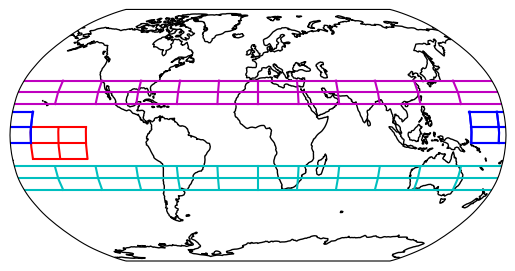

In [3]:
target_mesh_1 = GMesh.GMesh( lon=np.linspace(-165, -125, 3), lat=np.linspace(-15, 5, 3) )
target_mesh_2 = GMesh.GMesh( lon=np.linspace(155, 195, 3), lat=np.linspace(-5, 15, 3) )
target_mesh_2p = GMesh.GMesh( lon=np.linspace(155-360, 195-360, 3), lat=np.linspace(-5, 15, 3) )
target_mesh_3 = GMesh.GMesh( lon=np.linspace(0, 360, 13), lat=np.linspace(20, 35, 3) )
target_mesh_4 = GMesh.GMesh( lon=np.linspace(-180, 180, 13), lat=np.linspace(-35, -20, 3) )
ax = plt.subplot(111, projection=cartopy.crs.Robinson(central_longitude=0))
ax.plot([-180,180,0,0],[0,0,-90,90],'w.',transform=cartopy.crs.PlateCarree()) # Force full globe
ax.coastlines()
target_mesh_1.plot(ax, linecolor='r', transform=cartopy.crs.PlateCarree())
target_mesh_2.plot(ax, linecolor='b', transform=cartopy.crs.PlateCarree())
target_mesh_2p.plot(ax, linecolor='b', transform=cartopy.crs.PlateCarree())
target_mesh_3.plot(ax, linecolor='m', transform=cartopy.crs.PlateCarree()) # Global 0 .. 360
target_mesh_4.plot(ax, linecolor='c', transform=cartopy.crs.PlateCarree()) # Global -180 .. 180

# Fake datasets in various longitude ranges

Datasets tend to use cell-center constructs

In [4]:
dataset_1 = (np.linspace(-175,175,36),np.linspace(-80,80,9)) # -180 .. 180
dataset_2 = (np.linspace(5,355,36),np.linspace(-80,80,9)) # 0 .. 360
dataset_3 = (np.linspace(10,50,5),np.linspace(-10,20,4)) # regional
dataset_1, dataset_2, dataset_3

((array([-175., -165., -155., -145., -135., -125., -115., -105.,  -95.,
          -85.,  -75.,  -65.,  -55.,  -45.,  -35.,  -25.,  -15.,   -5.,
            5.,   15.,   25.,   35.,   45.,   55.,   65.,   75.,   85.,
           95.,  105.,  115.,  125.,  135.,  145.,  155.,  165.,  175.]),
  array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.])),
 (array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.,
         115., 125., 135., 145., 155., 165., 175., 185., 195., 205., 215.,
         225., 235., 245., 255., 265., 275., 285., 295., 305., 315., 325.,
         335., 345., 355.]),
  array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.])),
 (array([10., 20., 30., 40., 50.]), array([-10.,   0.,  10.,  20.])))

Find indexes of "mesh" within dataset.

(array([2, 4]), array([3, 4]))

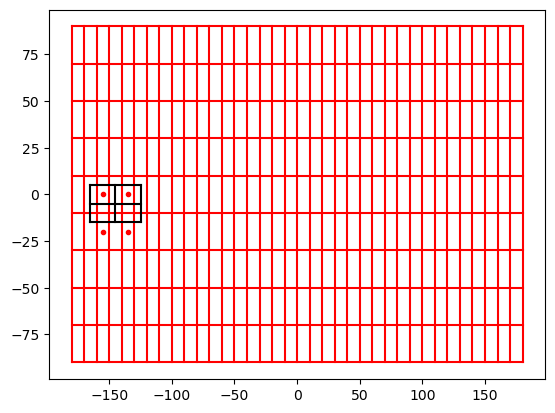

In [5]:
dataset, target_mesh = dataset_1, target_mesh_1
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([16, 19]), array([4, 5]))

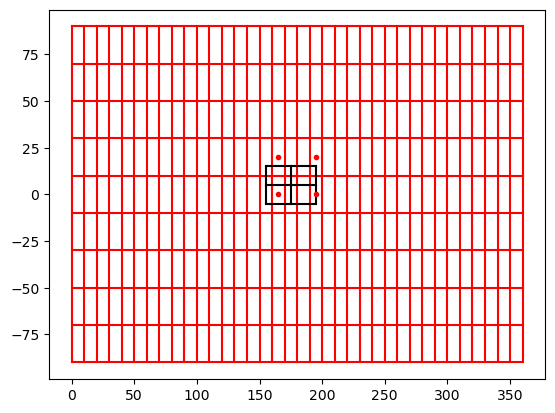

In [6]:
dataset, target_mesh = dataset_2, target_mesh_2
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([34,  0]), array([4, 5]))

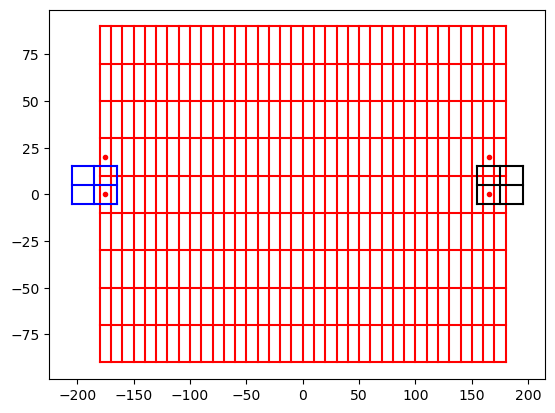

In [7]:
dataset, target_mesh = dataset_1, target_mesh_2
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
target_mesh_2p.plot(ax, linecolor='b')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([34,  0]), array([4, 5]))

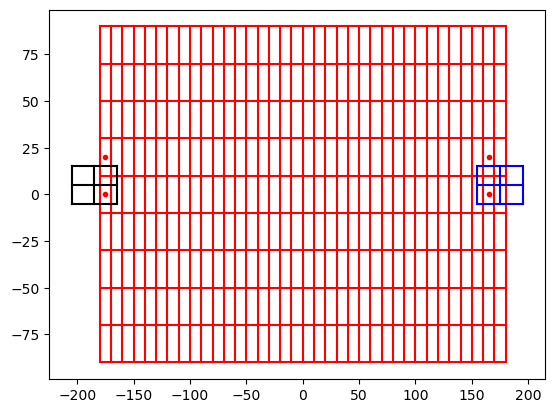

In [8]:
dataset, target_mesh = dataset_1, target_mesh_2p
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
target_mesh_2.plot(ax, linecolor='b')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([19, 22, 25, 28, 31, 34,  1,  4,  7, 10, 13, 16]), array([5, 6]))

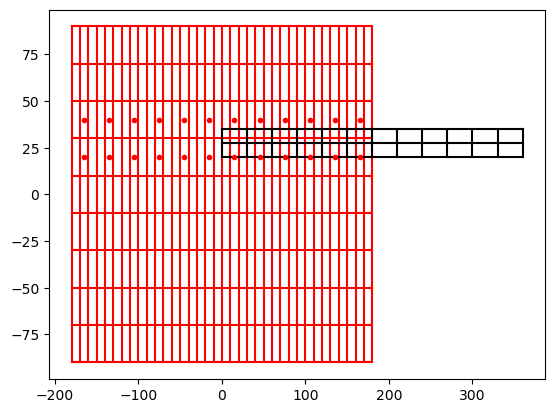

In [9]:
dataset, target_mesh = dataset_1, target_mesh_3
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([ 1,  4,  7, 10, 13, 16, 20, 23, 26, 29, 32, 35]), array([5, 6]))

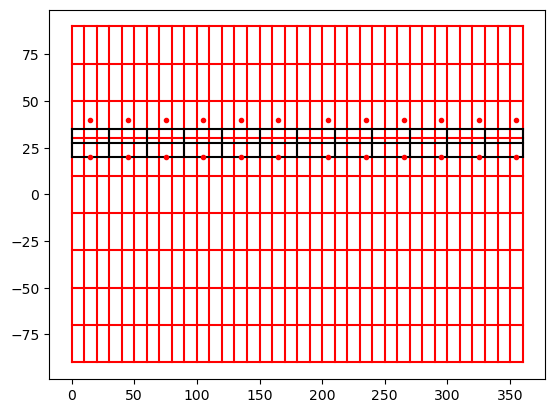

In [16]:
dataset, target_mesh = dataset_2, target_mesh_3
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset, use_center=True )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]), array([2, 3]))

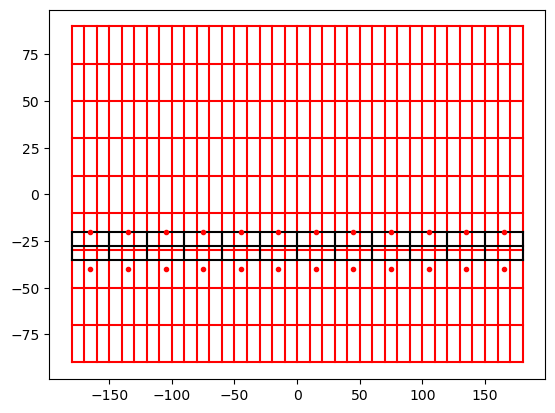

In [11]:
dataset, target_mesh = dataset_1, target_mesh_4
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]

(array([20, 23, 26, 29, 32, 35,  1,  4,  7, 10, 13, 16]), array([2, 3]))

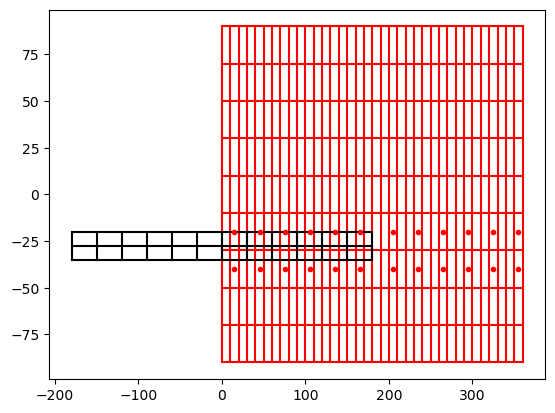

In [12]:
dataset, target_mesh = dataset_2, target_mesh_4
# Indices in to datasets
i1,j1 = target_mesh.find_nn_uniform_source( *dataset )
ax = plt.subplot(111)
GMesh.GMesh(lon=dataset[0],lat=dataset[1], from_cell_center=True).plot(ax, linecolor='r')
target_mesh.plot(ax, linecolor='k')
ax.plot(dataset[0][i1], dataset[1][j1], 'r.')
i1[0],j1[:,0]